# Lecture 9: Graph Traversal and Topological Sort

## Definitions
## Graph Representation

- Graph is a data structure $G = (V, E)$.
- Graph can be either directed or undirected.

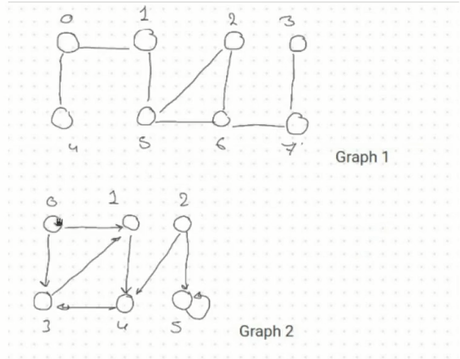

## Adjacency Matrix Representation
- Adjacency Matrix Time & Space Complexity: $O(|V|^2)$, where $V$ is the vertices count.
- Advantages: cheap and immediate acess of an edge/decide if they are connected or not.
- Disadvantages: spare graphs (which is the most case to happen) are very costy.

* Graph 1


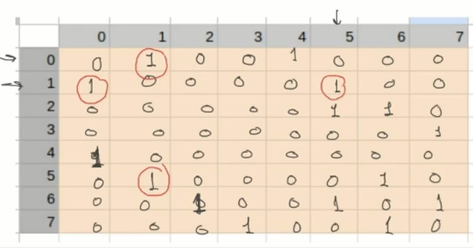

* Graph 2

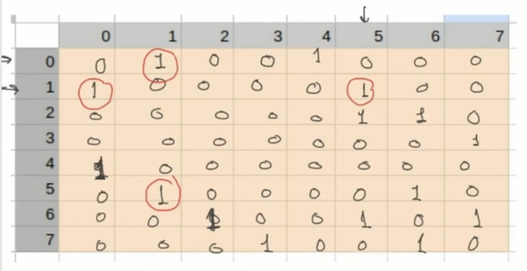

In [3]:
from graphviz import Digraph, Graph
graph_1_matrix = [
    [0, 1, 0, 0, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 1, 0, 1],
    [0, 0, 0, 1, 0, 0, 1, 0]
]

graph_2_matrix = [
    [0, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1, 1],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1],
]

def draw_graph_matrix(matrix, directed = False):
    if directed:
        dot = Digraph(format="svg")
    else: dot = Graph(format= "svg")

    for i,v in enumerate(matrix):
        dot.node(name=str(i), label = str(i))

    if not directed:
        already_drawn = set()
    for node,edges in enumerate(matrix):
        for index, edge in enumerate(edges):
            if edge == 1:
                if directed:
                    dot.edge(str(node), str(index))
                else:
                    fixed_representation = tuple(sorted([node,index]))
                    if fixed_representation not in already_drawn:
                        dot.edge(str(node), str(edge))
                        already_drawn.add(fixed_representation)
    return dot
draw_graph_matrix(graph_2_matrix, directed=True)


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

## Adjacency List representation

- Adjacency List Time & Space Complexity: $O(E^2)$, where $E$ is the edges count.
- Advantages: very compact in storage
- Disadvantages: in order to traverse the list, you have to go through all the vertices/list at one edge, or make a look up table

In [1]:
from graphviz.graphs import Graph
graph_1_vertices=set(list(range(8)))
graph_1_edges={
    0:[1,4],
    1:[0,5],
    2:[5,6],
    3:[7],
    4:[0],
    5:[1,2,6],
    6:[2,5,7],
    7:[3,6],
}

graph_2_vertices=set(list(range(6)))
graph_2_edges={
    0:[1,3],
    1:[4],
    2:[4,5],
    3:[1],
    4:[3],
    5:[5],
    
}

from graphviz import Digraph 
def draw_graph(vertices,edges,directed=False):
  if directed:
    dot=Digraph(format="svg")
  else:
    dot=Graph(format="svg")
  for v in vertices:
    dot.node(name=str(v),label=f"{v}")
  if not directed:
    already_drawn=set()
  for k,v in edges.items():
    for curr_v in v:
      if directed:
        dot.edge(str(k),str(curr_v))
      else:
        sorted_edge=tuple(sorted([k,curr_v]))
        if sorted_edge not in already_drawn:
          already_drawn.add(sorted_edge)
          dot.edge (str(k),str(curr_v))
  return dot
draw_graph(graph_1_vertices,graph_1_edges)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

## Graph Traversal
It is an algorithm (program) that is given:
- A Graph: $G$,
- A distinguished source vetrex: $s$.

The program <font size="5.5rem" color="Crismon">Systematically</font> follow the edges of the graph so as to visit the verticies.
Today we are exploring:
- **Breadth First Traversal**: This systematically visits every vertex $v$ in the graph <font color="Violet">reachable</font> from $s$, while identifying the shortest path from $s$ to $v$.
- **Depth First Traversal**: This systematically visits every vertex $v$ in the graph <font color="Violet">reachable</font> from $s$ following the strategy:
  1.   Explores edges out of the most recencly discovered vertext $v$
  2.   Once all of the edges of $v$ have been explored, the search <font color="green">backtracks</font> to explore other edges leaving the vertex from which $v$ was discovered.
- **Topological Sort**: Specific only to <font color="Crismon">DAGs</font> (Directed Acyclic Graphs). It visits all nodes reachable from $s$, so as to return a linear sorting of all its vertices such that if $G$ contains an edge from $u$ and $v$. Then $u$ appears before $v$ in this ordering.

### Breadth First Search (BFS)
- You can Imagine it as an Expanding Boundary.
- Where it visits the source vertex at first, the the vertices that are 1 edge away of it, 
then the vertices that are 2 vertices away of it, and so on and so forth.

In [24]:
from collections import deque

# setting graph
graph_vertices=graph_1_vertices
graph_edges=graph_1_edges

# setting source vertex 
s=1
# creating q
# queue is a data strcutrue 
# first in first out
q=deque()
visited=set()
# intializing
q.append(s)
visited.add(s)
edge_counter = 0

while len(q) > 0:
  # pop queue get some one out of queue 
  curr_vertex=q.popleft()
  
  # visit nodes
  print(f"visiting:{curr_vertex}")
  

  for neighbor in (graph_edges[curr_vertex]):
    if neighbor not in visited:
      # append to the queue
      q.append(neighbor)
      # make sure we dont revisit
      visited.add(neighbor)
      # keep track of the edges too
  
  

visiting:1
visiting:0
visiting:5
visiting:4
visiting:2
visiting:6
visiting:7
visiting:3


In [31]:
from collections import deque

# setting graph
graph_vertices=graph_1_vertices
graph_edges=graph_1_edges

# setting source vertex 
s=7
# creating q
# queue is a data strcutrue 
# first in first out
q=deque()
visited=set()
# intializing (a queue of tuples)
q.append((s, 0))  # append a tuple with vertex and edge count
visited.add(s)

while len(q) > 0:
  # pop queue get some one out of queue 
  curr_vertex, edge_counter = q.popleft()  # unpack the tuple
  
  # visit nodes
  print(f"visiting:{curr_vertex}, and it's {edge_counter} edges away from {s}")
  
  for neighbor in (graph_edges[curr_vertex]):
    if neighbor not in visited:
      # append to the queue
      q.append((neighbor, edge_counter + 1))  # increment edge_counter
      # make sure we dont revisit
      visited.add(neighbor)


visiting:7, and it's 0 edges away from 7
visiting:3, and it's 1 edges away from 7
visiting:6, and it's 1 edges away from 7
visiting:2, and it's 2 edges away from 7
visiting:5, and it's 2 edges away from 7
visiting:1, and it's 3 edges away from 7
visiting:0, and it's 4 edges away from 7
visiting:4, and it's 5 edges away from 7


### Depth First Search

In [29]:
graph_vertices=graph_1_vertices
graph_edges=graph_1_edges

#setting source vertex
s=1
visited=set()

def dfs(v):
  #base case: node was perviously visited
  if v in visited:
    return
  else:
    #add to visited to
    visited.add(v)
    #visit v
    print(f"visit before neighbors:{v}")
    for neighbor in graph_edges[v]:
      # a recursive call
      dfs(neighbor)
dfs(s)

visit before neighbors:1
visit before neighbors:0
visit before neighbors:4
visit before neighbors:5
visit before neighbors:2
visit before neighbors:6
visit before neighbors:7
visit before neighbors:3


**Visiting After**

In [36]:
graph_vertices=graph_1_vertices
graph_edges=graph_1_edges

#setting source vertex
s=1
visited=set()
def dfs(v):
  #base case: node was perviously visited
  if v in visited:
    return
  else:
    #add to visited to
    visited.add(v)
    #visit v
    for neighbor in graph_edges[v]:
      # a recursive call
      dfs(neighbor)
    print(f"visit after neighbors:{v}")
dfs(s)

visit after neighbors:4
visit after neighbors:0
visit after neighbors:3
visit after neighbors:7
visit after neighbors:6
visit after neighbors:2
visit after neighbors:5
visit after neighbors:1


In [37]:
graph_vertices=graph_2_vertices
graph_edges=graph_2_edges

#setting source vertex
visited=set()

def dfs(v):
  #base case: node was perviously visited
  if v in visited:
    return
  else:
    #add to visited to
    visited.add(v)
    #visit v
    print(f"visit before neighbors:{v}")
    for neighbor in graph_edges[v]:
      # a recursive call
      dfs(neighbor)

for node in graph_vertices:
  if node not in visited:
    print(f"new dfs search ")
    dfs(node)

new dfs search 
visit before neighbors:0
visit before neighbors:1
visit before neighbors:4
visit before neighbors:3
new dfs search 
visit before neighbors:2
visit before neighbors:5


In [41]:
graph_vertices=graph_1_vertices
graph_edges=graph_1_edges

#setting source vertex
visited=set()

def dfs(v):
  #base case: node was perviously visited
  if v in visited:
    return
  else:
    #add to visited to
    visited.add(v)
    #visit v
    
    for neighbor in graph_edges[v]:
      # a recursive call
      dfs(neighbor)
    print(f"visit topo :{v}")

for node in graph_vertices:
  if node not in visited:
    # print(f"new dfs search ")
    dfs(node)

visit topo :3
visit topo :7
visit topo :6
visit topo :2
visit topo :5
visit topo :1
visit topo :4
visit topo :0


In [42]:
graph_vertices=graph_2_vertices
graph_edges=graph_2_edges

#setting source vertex
visited=set()

def dfs(v):
  #base case: node was perviously visited
  if v in visited:
    return
  else:
    #add to visited to
    visited.add(v)
    #visit v
    
    for neighbor in graph_edges[v]:
      # a recursive call
      dfs(neighbor)
    print(f"visit topo :{v}")

for node in graph_vertices:
  if node not in visited:
    # print(f"new dfs search ")
    dfs(node)

visit topo :3
visit topo :4
visit topo :1
visit topo :0
visit topo :5
visit topo :2
